# Predicting Diabetes Status (max. 2000 words)

## Introduction

Diabetes is a chronic metabolic disease where the body cannot produce or use insulin, a hormone that allows sugar to be used for energy. The effects of untreated diabetes can be damaging to various organs, and approximately [422 million](https://www.who.int/health-topics/diabetes#tab=tab_1) people globally have diabetes. It is therefore imperative that diabetes be diagnosed as early as possible to minimise potential complications.

This project aims to create a feasible model for predicting diabetes. Literature has found that [Hba1c levels](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4933534/), [age](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9843502/#:~:text=Advanced%20age%20is%20a%20major%20risk%20factor%20for%20diabetes%20and%20prediabetes.&text=Therefore%2C%20the%20elderly%20has%20a,%2C%20retinal%2C%20and%20renal%20systems.), [hypertension and heart disease statuses](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5953551/) can be related to diabetes, and so the question to be answered is:  can diabetes status be predicted from  these 4 variables?

To answer the overarching question, the dataset that will be used in this project is the [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) created by Mohammed Mustafa on kaggle. It contains patient records organised into 8 variables (age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level,  and blood glucose level) and a predicted outcome (diabetes status).

## Methods and Results

### Methods
1. Data Cleaning: Before any analysis is conducted, the dataset will be cleaned to handle missing values, outliers, or any inconsistencies.
2. Variable Selection: Not all variables/columns in a dataset may be relevant or useful for prediction. We will primarily focus on variables such as Hba1c levels, age, hypertension and heart disease statuses. These have been shown in various studies to be influential factors in the onset of diabetes. However, other variables may be included or excluded based on their correlation with the predicted outcome (diabetes status) and their importance in the model.
3. Data Splitting: The dataset will be divided into training and testing sets. The training set will be used to train our predictive model, while the testing set will be used to evaluate the model's performance.
4. Model Building and Evaluation: The focus will be the KNN classification model. Its performance will be assessed using appropriate metrics, such as accuracy, recall, precision.
5. Results Visualization: A comparison between the majority classifier's accuracy and our KNN classifier's accuracy will be visualised using a bar graph (geom_bar()).

### Results

In [2]:
# for re-installing packages if Jupyter Open uninstalls them
install.packages("corrplot")
install.packages("Hmisc")
install.packages("gridExtra")
install.packages("themis")
install.packages("kknn")
install.packages("caret")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘cluster’, ‘foreign’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(corrplot)
library(Hmisc)
library(gridExtra)
library(themis)
library(kknn)
library(caret)
options(repr.matrix.max.rows = 15)
options(repr.plot.width = 7, repr.plot.height = 8)
set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/florencesanjaya/DSCI-100-2023w1-group-36/main/diabetes_prediction_dataset.csv") |>
    mutate(diabetes = as_factor(diabetes))
diabetes_data

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Female,80,0,1,never,25.19,6.6,140,0
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5.0,155,0
Male,76,1,1,current,20.14,4.8,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,44,0,0,never,19.31,6.5,200,1
Female,79,0,0,No Info,23.86,5.7,85,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [5]:
# Diabetes is rare among children under age 5 (Pregnancy, Birth and Baby, n.d.), so only people above 5 years old are considered.
diabetes_data <- diabetes_data |>
    filter(age > 5)
diabetes_data

gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Female,80,0,1,never,25.19,6.6,140,0
Female,54,0,0,No Info,27.32,6.6,80,0
Male,28,0,0,never,27.32,5.7,158,0
Female,36,0,0,current,23.45,5.0,155,0
Male,76,1,1,current,20.14,4.8,155,0
Female,20,0,0,never,27.32,6.6,85,0
Female,44,0,0,never,19.31,6.5,200,1
Female,79,0,0,No Info,23.86,5.7,85,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [6]:
# Splitting data into training and testing sets
diabetes_split <- initial_split(diabetes_data, prop = 0.75, strata = diabetes)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)
glimpse(diabetes_training)

Rows: 70,296
Columns: 9
$ gender              <chr> "Female", "Female", "Male", "Female", "Female", "F…
$ age                 <dbl> 80, 54, 28, 20, 44, 32, 53, 78, 67, 76, 78, 15, 42…
$ hypertension        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ heart_disease       <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ smoking_history     <chr> "never", "No Info", "never", "never", "never", "ne…
$ bmi                 <dbl> 25.19, 27.32, 27.32, 27.32, 19.31, 27.32, 27.32, 3…
$ HbA1c_level         <dbl> 6.6, 6.6, 5.7, 6.6, 6.5, 5.0, 6.1, 5.0, 5.8, 5.0, …
$ blood_glucose_level <dbl> 140, 80, 158, 85, 200, 100, 85, 130, 200, 160, 126…
$ diabetes            <fct> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


#### Model execution using *caret* package

Confusion Matrix and Statistics

           truth
knn_cv_pred     0     1
          0 21344  1204
          1     4   881
                                          
               Accuracy : 0.9484          
                 95% CI : (0.9455, 0.9512)
    No Information Rate : 0.911           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5705          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.4225          
         Pos Pred Value : 0.9466          
         Neg Pred Value : 0.9955          
             Prevalence : 0.9110          
         Detection Rate : 0.9109          
   Detection Prevalence : 0.9622          
      Balanced Accuracy : 0.7112          
                                          
       'Positive' Class : 0               
                  

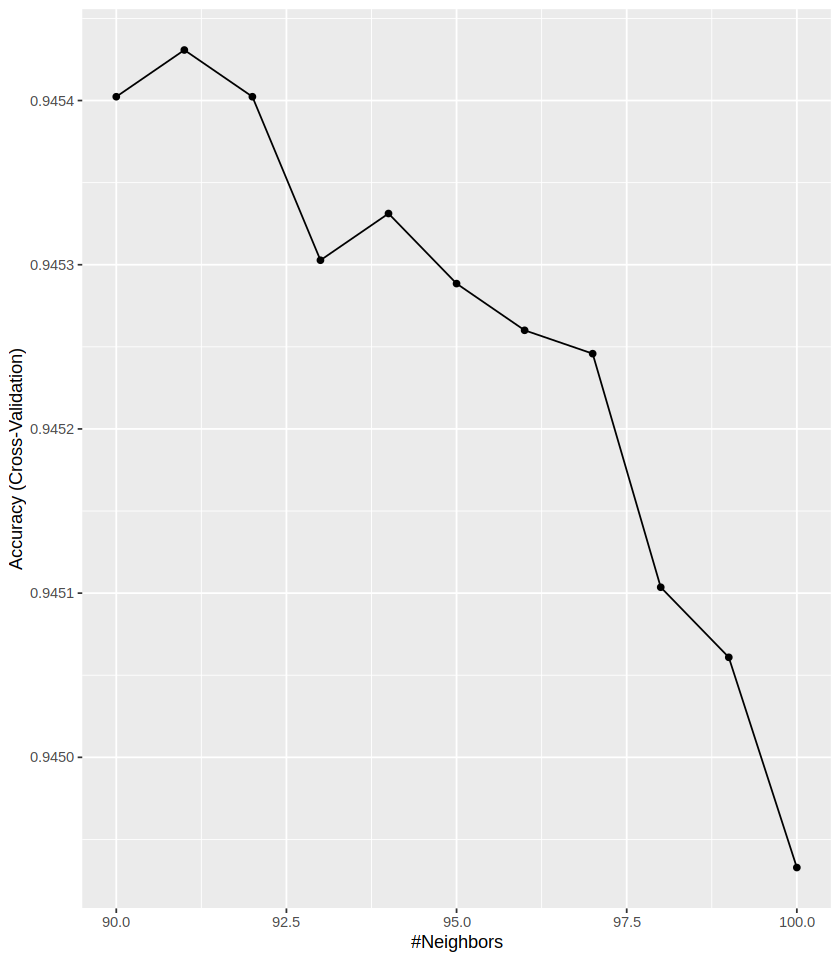

In [7]:
# Model before upsampling

# Setting 5-fold cross validation
control <- trainControl(method = "cv", number = 5, verboseIter = FALSE)


knn_cv_train <- train(diabetes ~ age + hypertension + heart_disease + HbA1c_level,
                   method = "knn",
                   data = diabetes_training,
                   preProcess = c("center", "scale"),
                   tuneGrid = data.frame(k = seq(90,100,1)),
                   trControl = control)


ggplot(knn_cv_train)

knn_cv_pred <- predict(knn_cv_train, newdata = diabetes_testing)

truth <- diabetes_testing$diabetes

confusionMatrix(table(knn_cv_pred,truth))

In [11]:
# Upsampling diabetes class (diabetes positive is rarer than diabetes negative) in training diabetes data
upsampled_recipe_training <- recipe(diabetes ~ age + hypertension + heart_disease + HbA1c_level, data = diabetes_training) |>
    step_upsample(diabetes, over_ratio = 1, skip = FALSE) |>
    prep()
upsampled_recipe_training # this recipe is only for upsampling

# Checking if classes are now balanced
upsampled_diabetes <- bake(upsampled_recipe_training, diabetes_data) |>
    group_by(diabetes) |>
    summarise(n = n()) # use 'summarise' (from dplyr package) instead of 'summarize' (from tidymodels)
upsampled_diabetes

# Bake the upsampling recipe on training data
diabetes_training_upsampled <- bake(upsampled_recipe_training, diabetes_training)
diabetes_training_upsampled

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 70296 data points and no missing data.

Operations:

Up-sampling based on diabetes [trained]

diabetes,n
<fct>,<int>
0,85237
1,63889


age,hypertension,heart_disease,HbA1c_level,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
80,0,1,6.6,0
54,0,0,6.6,0
28,0,0,5.7,0
20,0,0,6.6,0
32,0,0,5.0,0
53,0,0,6.1,0
78,0,0,5.0,0
67,0,0,5.8,0
⋮,⋮,⋮,⋮,⋮


In [12]:
# Upsampling diabetes class in testing diabetes data
upsampled_recipe_testing <- recipe(diabetes ~ age + hypertension + heart_disease + HbA1c_level, data = diabetes_testing) |>
    step_upsample(diabetes, over_ratio = 1, skip = FALSE) |>
    prep()
upsampled_recipe_testing

# Checking if classes are now balanced
upsampled_diabetes_testing <- bake(upsampled_recipe_testing, diabetes_data) |>
    group_by(diabetes) |>
    summarise(n = n())
upsampled_diabetes_testing

# Bake the upsampling recipe on testing data
diabetes_testing_upsampled <- bake(upsampled_recipe_testing, diabetes_testing)
diabetes_testing_upsampled

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 23433 data points and no missing data.

Operations:

Up-sampling based on diabetes [trained]

diabetes,n
<fct>,<int>
0,85237
1,21348


age,hypertension,heart_disease,HbA1c_level,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
36,0,0,5.0,0
76,1,1,4.8,0
79,0,0,5.7,0
42,0,0,4.8,0
54,0,0,6.0,0
37,0,0,3.5,0
40,0,0,6.0,0
43,0,0,6.1,0
⋮,⋮,⋮,⋮,⋮


Confusion Matrix and Statistics

                      truth_upsampled
knn_cv_pred_upsampling     0     1
                     0 17150  2777
                     1  4198 18571
                                          
               Accuracy : 0.8366          
                 95% CI : (0.8331, 0.8401)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6733          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8034          
            Specificity : 0.8699          
         Pos Pred Value : 0.8606          
         Neg Pred Value : 0.8156          
             Prevalence : 0.5000          
         Detection Rate : 0.4017          
   Detection Prevalence : 0.4667          
      Balanced Accuracy : 0.8366          
                                          
       

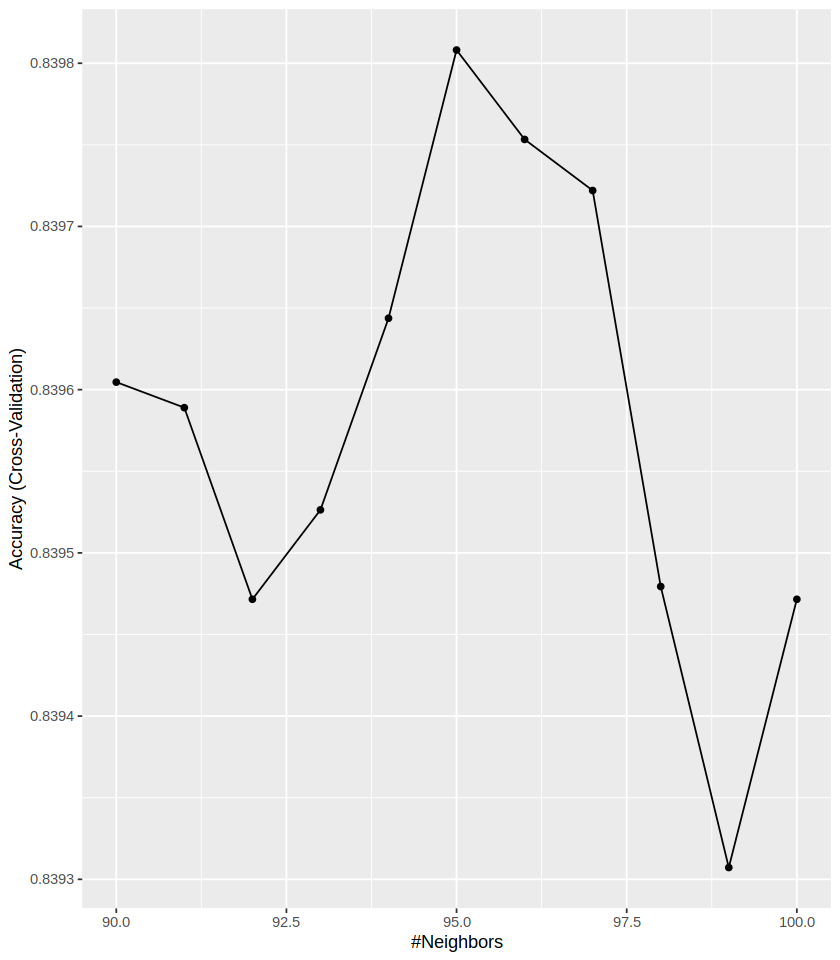

In [13]:
# Model after upsampling
knn_cv_train_upsampling <- train(diabetes ~ age + hypertension + heart_disease + HbA1c_level,
                   method = "knn",
                   data = diabetes_training_upsampled,
                   preProcess = c("center", "scale"),
                   tuneGrid = data.frame(k = seq(90,100,1)),
                   trControl = control)


ggplot(knn_cv_train_upsampling)

knn_cv_pred_upsampling <- predict(knn_cv_train_upsampling, newdata = diabetes_testing_upsampled)

truth_upsampled <- diabetes_testing_upsampled$diabetes

confusionMatrix(table(knn_cv_pred_upsampling,truth_upsampled))

model,accuracy
<chr>,<dbl>
original_data_majority_classifier,91.18
original_KNN_classification_model,94.84
upsampled_data_majority_classifier,57.16
upsampled_KNN_classification_model,83.66


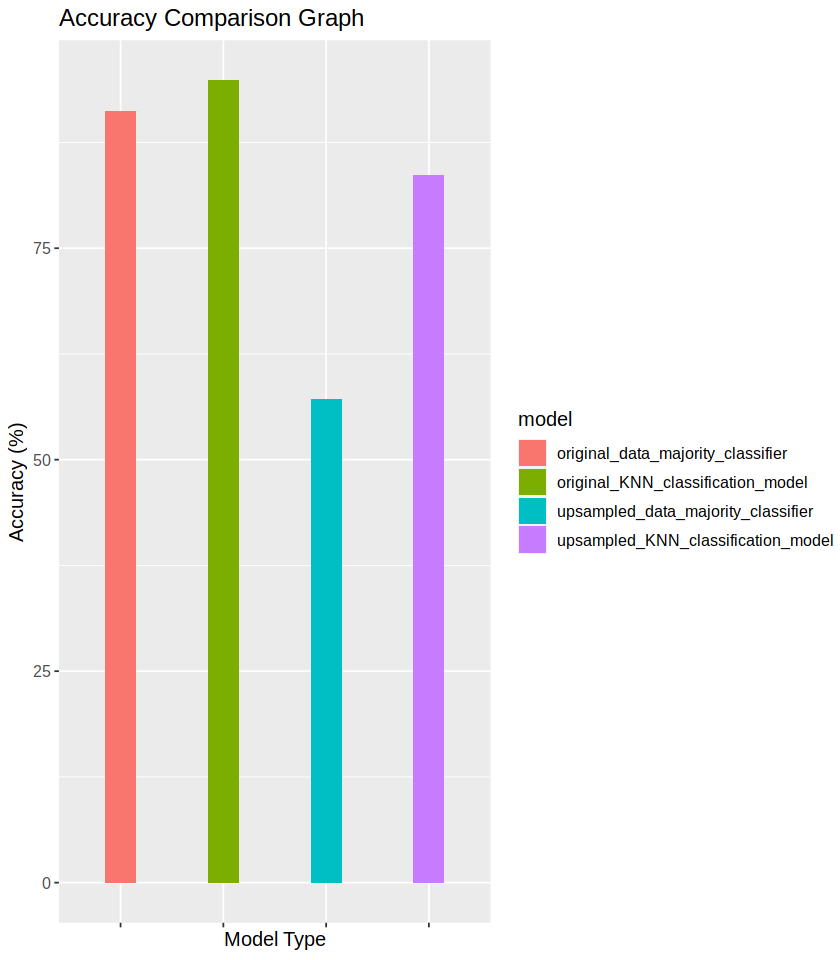

In [36]:
# Accuracy comparison graph between majority classifier, original data KNN classification model, and upsampled data KNN classification model
# Original data majority classifier accuracy = 91.18%. This is from the percentage of non-diabetic people, who make up the majority of the data
# Upsampled data majority classifier accuracy = 57.16% (based on training set)
graph_df <- tibble(original_data_majority_classifier = 91.18, 
                   original_KNN_classification_model = 94.84,
                   upsampled_data_majority_classifier = 57.16,
                   upsampled_KNN_classification_model = 83.66) |>
    pivot_longer(original_data_majority_classifier:upsampled_KNN_classification_model, names_to = "model", values_to = "accuracy")
graph_df

acc_comparison_graph <- graph_df |>
    ggplot(aes(x = model, y = accuracy, fill = model)) +
    geom_bar(stat = "identity", width = 0.3) +
    labs(x = "Model Type", y = "Accuracy (%)") +
    ggtitle("Accuracy Comparison Graph") +
    theme(text = element_text(size = 12), axis.text.x = element_blank())
acc_comparison_graph
# Colours used due to the length of x-axis labels

## Discussion

*The results from the models shows that when Hba1c levels, age, hypertension, heart disease statuses are considered in conjunction, there is a higher accuracy rate in predicting whether an individual is diabetic. The original majority classifier model (91.18%) and KNN classification model (94.84%) shows almost 90% accuracy rate. Although the accuracy rate is lower, the upsampled data majority classifier (57.16%) and upsampled KNN classification model (83.66%) demonstrates that the model is further accurate with an increase of 0.04% in cross validation accuracy compared to the original data. Upsampled data may have incurred a lower accuracy rate due to the data set enlarging the ratio between non-diabetics to diabetics.*

*Expectations during the preliminary analysis were that those with older age, higher Hba1c levels, with both hypertension and heart disease are more likely to have diabetes. The results aligned with the set expectations and the current literature as studies state that [diabetes favours the frailty of older patients and are more likely to show up in older age groups](https://doi.org/10.1097/MCO.0000000000000535), [diabetes and hypertension are commonly found to coexist—diabetes causally affecting hypertension; hypertension and diabetes could increase the risk of cardiovascular disease–heart disease](https://doi.org/10.1161/CIRCRESAHA.118.3144872019), and [high levels of Hba1c was a method to measure strength and predictability of diabetes](https://link.springer.com/article/10.1007/s00198-018-4678-3).*

Utilising machine learning to comb through multitudes of patient data can accelerate crucial decision-making, especially in clinical settings where healthcare providers must consider diabetic potential in some patients’ treatments. We believe that our findings can provide a step closer to accomplishing this by confirming the correlational relationship between the 4 variables and diabetes.

Future questions to consider:
1. Can we differentiate between type 1 and type 2 diabetes with our predictors?
2. Would using a larger dataset alter the accuracy of our predictors?

## Word Count

The total word count is xxxxx.

## References

**(currently using APA 7th ed.)**

Mustafa, M. (2023). *Diabetes prediction dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

Petrie, J. R., Guzik, T. J., & Touyz, R. M. (2018). Diabetes, Hypertension, and Cardiovascular Disease: Clinical Insights and Vascular Mechanisms. The Canadian journal of cardiology, 34(5), 575–584. https://doi.org/10.1016/j.cjca.2017.12.005

Pregnancy, Birth and Baby. (n.d.). Diabetes in young children. https://www.pregnancybirthbaby.org.au/diabetes-in-young-children#:~:text=Diabetes%20is%20rare%20in%20children,diabetes%20and%20manage%20the%20condition

Sherwani, S. I., Khan, H. A., Ekhzaimy, A., Masood, A., Sakharkar, M. K. (2016). Significance of HbA1c Test in Diagnosis and Prognosis of Diabetic Patients. *Biomarker Insights, 11*, 95-104. https://doi.org/10.4137%2FBMI.S38440

Yan, Z., Cai, M., Han, X., Chen, Q., & Lu, H. (2023). The Interaction Between Age and Risk Factors for Diabetes and Prediabetes: A Community-Based Cross-Sectional Study. *Diabetes, metabolic syndrome and obesity : targets and therapy, 16*, 85–93. https://doi.org/10.2147/DMSO.S390857